In [678]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3

'%.3f'

### 1.1 Pandas
- Load the data using pandas
- Summarize each NUMERIC eld in the data, i.e. mean, average etc.
- Group data by the eld 'Name'.
- Find the average price,average income and average number of pumps for each group.
- Use a boxplot that visualizes the statistical information about (price, pumps, gasoline).
- Use the Price and Income features in order to plot a prediction line similar to the first exercise. Normalize the Income  implement this yourself) and plot the line again. Comment on the different of the two plots.

In [685]:
#Load the data using pandas
data = pd.read_csv(r'C:\Users\Anurag\GasPrices.csv')  
#Summarize the numerics of data
data.describe()

,Unnamed: 0,ID,Price,Pumps,Gasolines,Zipcode,Income
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,51.000000,1.864257,6.950495,3.465347,78730.782178,56727.217822
std,29.300171,29.300171,0.081515,3.925242,0.557931,22.054298,25868.359804
min,1.000000,1.000000,1.730000,2.000000,1.000000,78701.000000,12786.000000
25%,26.000000,26.000000,1.790000,4.000000,3.000000,78704.000000,37690.000000
50%,51.000000,51.000000,1.850000,6.000000,3.000000,78731.000000,52306.000000
75%,76.000000,76.000000,1.920000,8.000000,4.000000,78752.000000,70095.000000
max,101.000000,101.000000,2.090000,24.000000,4.000000,78759.000000,128556.000000


In [680]:
#Group data by the field 'Name
grouped_data = data.groupby('Name')
print("Average Price Per group\n")
print(grouped_data.mean()['Price'])
print("\nAverage Income Per group\n")
print(grouped_data.mean()['Income'])
print("\nAverage Pumps Per group\n")
print(grouped_data.mean()['Pumps'])

Average Price Per group

Name
7-Eleven                   1.887778
Around the Corner Store    1.940000
Chevron                    1.871818
Citgo                      1.835000
Conoco                     1.890000
Costco                     1.730000
Double R Grocery           1.790000
East 1st Grocery           1.770000
Exxon                      1.855000
Gulf                       1.788571
HEB Fuel                   1.790000
Kool Corner                1.790000
Lamar Corner Store         1.890000
Major Brand Gas            1.790000
Mobil                      1.865000
Phillips 66                1.890000
Shell                      1.883793
Signature Fuels            1.795000
Texaco                     1.912000
Valero                     1.891429
Name: Price, dtype: float64

Average Income Per group

Name
7-Eleven                   53432.333333
Around the Corner Store    63750.000000
Chevron                    61754.636364
Citgo                      49387.000000
Conoco                     435

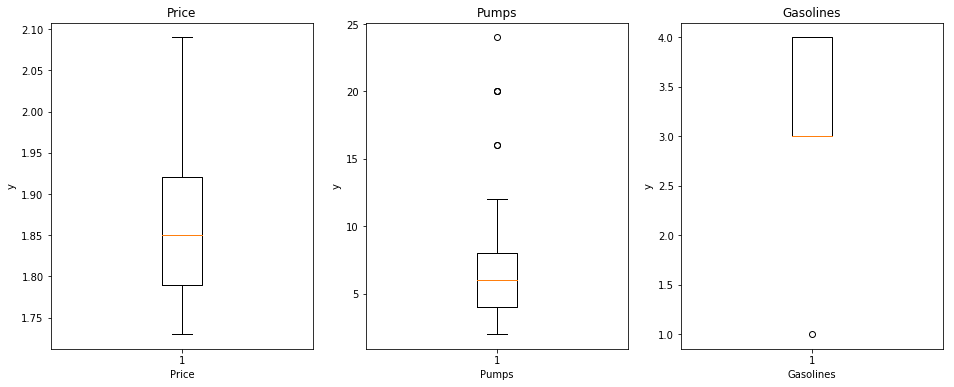

In [681]:
# Creates blank canvas
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))

for ax,col_name in zip(axes,['Price','Pumps','Gasolines']):
                       ax.boxplot(data[col_name])
                       ax.set_xlabel(col_name)
                       ax.set_ylabel('y')
                       ax.set_title(col_name)

### Implementing the Linear Regression 

Beta values are -177642.80706407555,125717.62979165983


Text(0.5,1,'Price vs Income')

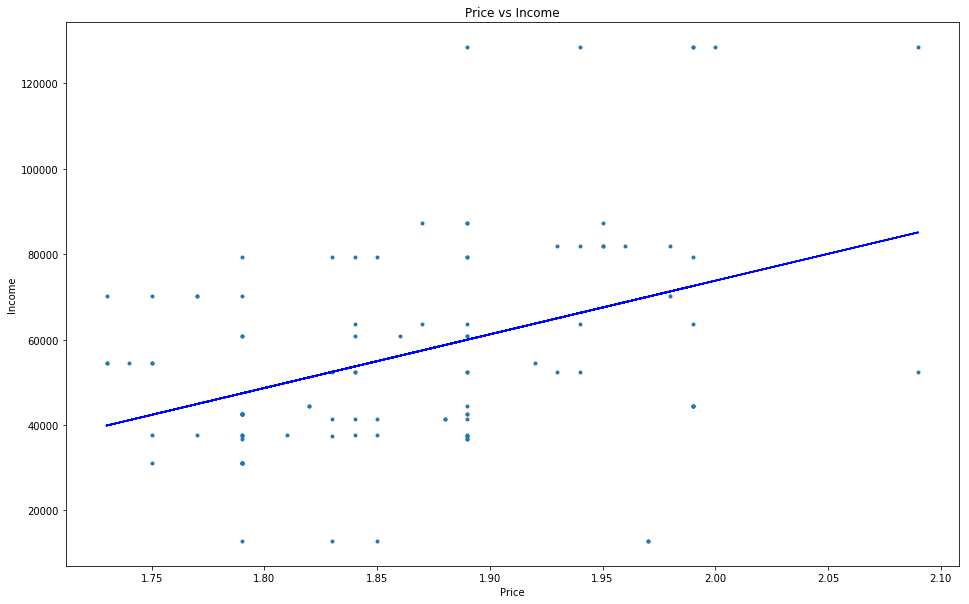

In [682]:
X,Y = data['Price'], data['Income']
beta_0 = beta0(X,Y)
beta_1 = beta1(X,Y)
yhat_without_norm = yhat(X, beta_0, beta_1)

print(f"Beta values are {beta_0},{beta_1}")

fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(X,Y,'.', X,yhat_without_norm,'-b')
ax.set_xlabel('Price')
ax.set_ylabel('Income')
ax.set_title("Price vs Income")

Beta values are -1.6448890650779608,1.0859257993578633


Text(0.5,1,'Price vs Income after normalizing')

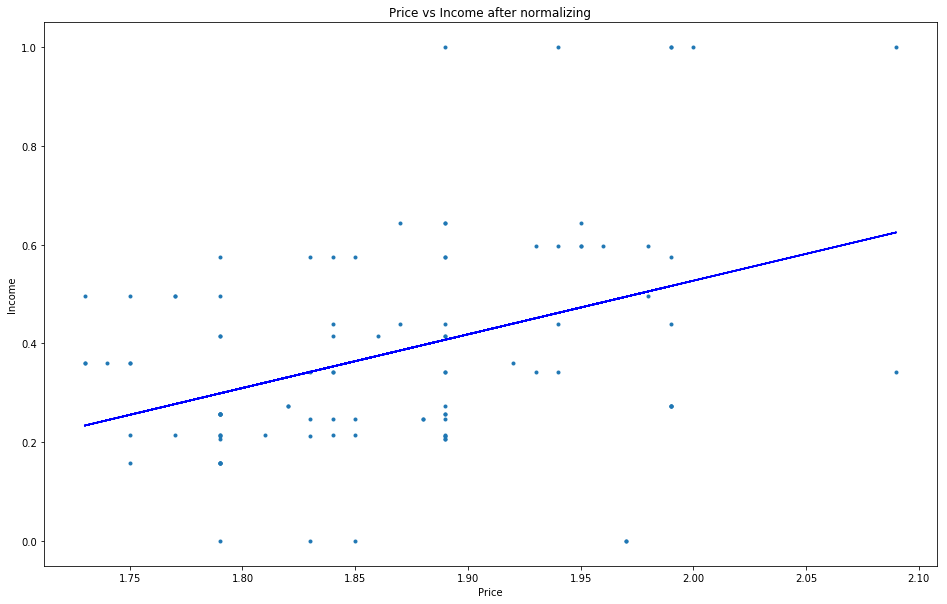

In [684]:
val = data['Income']
norm_val = (val -val.min())/(val.max()-val.min())

X,Y = data['Price'], norm_val
beta_0 = beta0(X,Y)
beta_1 = beta1(X,Y)
print(f"Beta values are {beta_0},{beta_1}")

yhat_norm = yhat(X, beta_0, beta_1)

fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(X,Y,'.', X,yhat_norm,'-b')
ax.set_xlabel('Price')
ax.set_ylabel('Income')
ax.set_title("Price vs Income after normalizing")

### It can be observed that the normalization introduces a change in the scale of the values. While the slopw and the intercept of the linear fit remain the same, the Income values are now limited between 0 and 1 post the normalization of income column.
### After normalization the parameters value become more intutitive and logical.

## 1.2 Linear Regression via Normal Equations

### Reuse dataset from Excercise 1. Load it as Xdata, [Hint:] from loaded data you need to separate ydata i.e. Income, which is your target.

In [674]:

def RMSE(y, yhat):
    #calculates the RMSE
    return np.sqrt(np.mean( (y-yhat)**2 ))

def MAE(y, yhat):
    #calculates MAE
    return (np.abs(y-yhat))

def average_MAE(y, yhat):
    #averages the MAE
    return np.mean(np.abs(y-yhat))

def backSub(a, b, n):
    #solves for upper triangular matrices
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / a[n-1, n-1]
    for row in range(n-2, -1, -1):
        sums = b[row]
        for j in range(row+1, n):
            sums = sums - a[row,j] * x[j]
        x[row] = sums / a[row,row]
    return x


def gauss(X_train,X_test,Y_test,Y_train):
    '''
    We use the parameters for first evaluating the test and train pred(solely for determining overfitting)
    Residuals are obtained on test results.
    A scatter plot for the residuals along with the plot between pred and true values is displayed.
    RMSE value and average value for both test and train prediction were obtained
    '''
    
    mGauss = gaussElimination(X_train,Y_train)
    Y_pred_test_gauss = np.dot(mGauss,X_test.T)
    Y_pred_train_gauss = np.dot(mGauss,X_train.T)
    residual_gauss = MAE(Y_test,Y_pred_test_gauss)
    
    #repeat for each
    plot(Y_test,Y_pred_test_gauss,residual_gauss,"Using Gaussian Elimination")
    #find the  average residuals
    average_test_residual_gauss = average_MAE(Y_test,Y_pred_test_gauss)
    rmse_test_gauss = RMSE(Y_test,Y_pred_test_gauss)
    average_train_residual_gauss = average_MAE(Y_train,Y_pred_train_gauss)
    rmse_train_gauss = RMSE(Y_train,Y_pred_train_gauss)
    print(f"THe Average test Residual for Gauss Decompositon {average_test_residual_gauss} and RMSE is {rmse_test_gauss}")
    print(f"THe Average train Residual for Gauss Decompositon {average_train_residual_gauss} and RMSE is {rmse_train_gauss}")


def gaussElimination(A,B):
    '''
    Gaussian elimination splits the matrix into 
    '''
    from scipy import linalg as linalg
    n = A.shape[0]
    LU = linalg.lu_factor(A)
    return linalg.lu_solve(LU, B)

def cholesky(X_train,X_test,Y_test,Y_train):
    '''
    We use the parameters for first evaluating the test and train pred(solely for determining overfitting)
    Residuals are obtained on test results.
    A scatter plot for the residuals along with the plot between pred and true values is displayed.
    RMSE value and average value for both test and train prediction were obtained
    '''
    
    mCholesky = choleskyDecomposition(X_train, Y_train)
    #perform the prediciton 
    Y_pred_test_mCholesky = np.dot(mCholesky,X_test.T)
    Y_pred_train_mCholesky = np.dot(mCholesky,X_train.T)
    #find residual 
    residual_mCholesky = MAE(Y_test,Y_pred_test_mCholesky)
    plot(Y_test,Y_pred_test_mCholesky,residual_mCholesky,"Using Cholesky Decompostion")
    average_test_residual_mCholesky = average_MAE(Y_test,Y_pred_test_mCholesky)
    rmse_test_mCholesky = RMSE(Y_test,Y_pred_test_mCholesky)
    average_train_residual_mCholesky = average_MAE(Y_train,Y_pred_train_mCholesky)
    rmse_train_mCholesky = RMSE(Y_train,Y_pred_train_mCholesky)
    print(f"The Average test Residual for Cholesky Decompositon {average_test_residual_mCholesky} and RMSE is {rmse_test_mCholesky}")
    print(f"The Average train Residual for Cholesky Decompositon {average_train_residual_mCholesky} and RMSE is {rmse_train_mCholesky}")

def choleskyDecomposition(A,b):
    '''
    Decomposed the matrix into lower triangular matrix and evalutes the parameters
    '''
    n = len(A)
    #check if the matrix is not positive definite 
    L = np.linalg.cholesky(A)
    #find the rsult
    c = np.matmul(np.linalg.inv(L),b)
    m = np.matmul(np.linalg.inv(L.T),c)
    return m
 
def QR(X_train,X_test,Y_test,Y_train): 
    '''
    We use the parameters for first evaluating the test and train pred(solely for determining overfitting)
    Residuals are obtained on test results.
    A scatter plot for the residuals along with the plot between pred and true values is displayed.
    RMSE value and average value for both test and train prediction were obtained
    '''
    
    mQR = QRDEcomposition(X_train,Y_train)
    Y_pred_test_mQR = np.dot(mQR,X_test.T)
    Y_pred_train_mQR = np.dot(mQR,X_train.T)
    residual_mQR = MAE(Y_test,Y_pred_test_mQR)
    average_test_residual_mQR = average_MAE(Y_test,Y_pred_test_mQR)
    plot(Y_test,Y_pred_test_mQR,residual_mQR,"Using QR Decompostion")
    rmse_test_mQR = RMSE(Y_test,Y_pred_test_mQR)
    average_train_residual_mQR = average_MAE(Y_train,Y_pred_train_mQR)
    rmse_train_mQR = RMSE(Y_train,Y_pred_train_mQR)
    print(f"The Average test Residual for QR Decompositon {average_test_residual_mQR} and RMSE is {rmse_test_mQR}")
    print(f"THe Average training Residual for QR Decompositon {average_train_residual_mQR} and RMSE is {rmse_train_mQR}")

def QRDEcomposition(A,b):
    '''
    Decomposes A into Q orthogonal matrix and R upper triangular matrix
    '''
    Q,R = np.linalg.qr(A)
    y = np.dot(Q.T, b)                      # Let y=Q'.B using matrix multiplication 
    x = np.linalg.solve(R, y)                 # Solve Rx=y 
    return x

def plot(Y_test,Y_pred_test,residual,title):
    '''
    Draws the necessary plots
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(16, 10))
    ax1.plot(np.sort(Y_test),np.sort(Y_pred_test),'-r')
    ax2.scatter(Y_test,residual)
    ax1.legend(['Test data'])
    ax2.legend(['Residuals'])
    ax1.set_xlabel('Y_test')
    ax1.set_ylabel('Y_pred')
    ax2.set_xlabel('Y_test')
    ax2.set_ylabel('Residual')
    ax1.grid()
    ax2.grid()
    ax1.set_title(title)
    ax2.set_title(title)

## Preprocesssing the data
### Convert the 'Y'/'N' to 1s and 0s
 *Converting the values help in two ways, it converts the numeric values to string, and also helps in removing sparsity that is introduced due to use to dummy variables in some case.*
 *Creating dummy variables introduced sparsity causing the data to become non positive definite, which cannot be decomposed using cholesky's decomposition*
 
 
### Remove unnecessary columns
*We can obesrve that columns such as 'Unnamed: 0', 'ID','Name','Brand','IntersectionStoplight','Address','Zipcode' can be removed because*
 #### Unnamed: 0 represents index not useful for prediction
 #### ID serves as index column hence not useful
 #### Name and Brand are very generic data, and hence are not conclusive of the income
 #### IntersectionStoplight is a redundant column combining the values of Intersection and Stoplight column
 #### Address and Zipcode are part of description of each data points and is assumed to vary accross the dataset.*


### Plot the histogram for the income and identify the outliers
 #### It was observed that income group of 12,000 has only 6 datapoints and hence can be considered as outlier,

### Introduce the bias column
 #### This parameter represents and explains the error or biasness of a prediction 
### Normalize the data
 #### Normalization helps in narrowing the scale of values to between 0 and 1. This helps in better understanding of error values and creates 
### Split the data into (80%-20%) 
 #### This is done by first creating an array representing the index of datapoints, shuffling it and then splitting it.
     
### Create the Y value
  #### Assign the column to Y post the processing and random shuffle, NOT BEFORE THAT.
  
### Define the algorithms, use it to predict the parameters
   
### Plot residual,find average residual and RMSE for each model
  #### In order to understand and observe underfitting and overfitting, I used the RMSE for  training and test data. It was observed    that the training error was significantly lower than the test error, indicating overfitting.
  
### Benchmarking
 #### The main purpose of benchmarking was to compare the performance of Scikit libraries vs the ground implementation done here. Scikit performed better than my implementation naturally, MSE score for Scikit were different from mine by nearly 0.20. This can be attributed to further regualrization of the parameters done by sci-kit libraries 



#### Preprocessing block

C:\Users\Anurag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


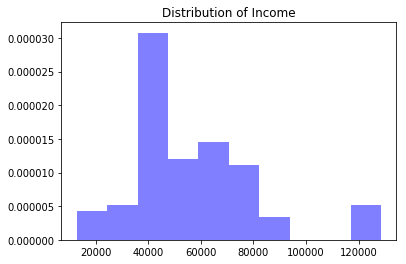

In [677]:
#np.random.RandomState(4)
#convert the Y/Ns
Xdata = pd.read_csv(r'C:\Users\Anurag\GasPrices.csv') 
Xdata['Interior'] = Xdata['Interior'].replace(to_replace={'Y':1,'N':0})
Xdata['Restaurant'] = Xdata['Restaurant'].replace(to_replace={'Y':1,'N':0})
Xdata['CarWash'] = Xdata['CarWash'].replace(to_replace={'Y':1,'N':0})
Xdata['Intersection'] = Xdata['Intersection'].replace(to_replace={'Y':1,'N':0})
Xdata['Stoplight'] = Xdata['Stoplight'].replace(to_replace={'Y':1,'N':0})
Xdata['Competitors'] = Xdata['Competitors'].replace(to_replace={'Y':1,'N':0})
Xdata['Highway'] = Xdata['Highway'].replace(to_replace={'Y':1,'N':0})

#plot the histogram
num_bins = 10
plt.hist(Xdata['Income'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.title('Distribution of Income')
plt.show()

#drop the irrelevant columns
Xdata.drop(Xdata[['Unnamed: 0', 'ID','Name','Brand','Restaurant','IntersectionStoplight','Intersection','Competitors','Address','Zipcode']], axis= 1, inplace=True)


#spew out the random indexes for random data
np.random.RandomState(4)
def produce_random_index(size):
    indexes = np.arange(0,size,1)
    np.random.shuffle(indexes)
    return indexes

#normalize the data using min max normalization
Xdata = (Xdata-Xdata.min())/(Xdata.max()-Xdata.min())

THe Average test Residual for Gauss Decompositon 0.483289130743121 and RMSE is 0.6144654264979259
THe Average train Residual for Gauss Decompositon 6.661338147750939e-16 and RMSE is 1.4043333874306805e-15
The Average test Residual for Cholesky Decompositon 0.4832891307431215 and RMSE is 0.6144654264979263
The Average train Residual for Cholesky Decompositon 2.55351295663786e-15 and RMSE is 3.833084183753514e-15
The Average test Residual for QR Decompositon 0.4832891307431201 and RMSE is 0.6144654264979247
THe Average training Residual for QR Decompositon 2.886579864025407e-15 and RMSE is 3.7155169009665e-15


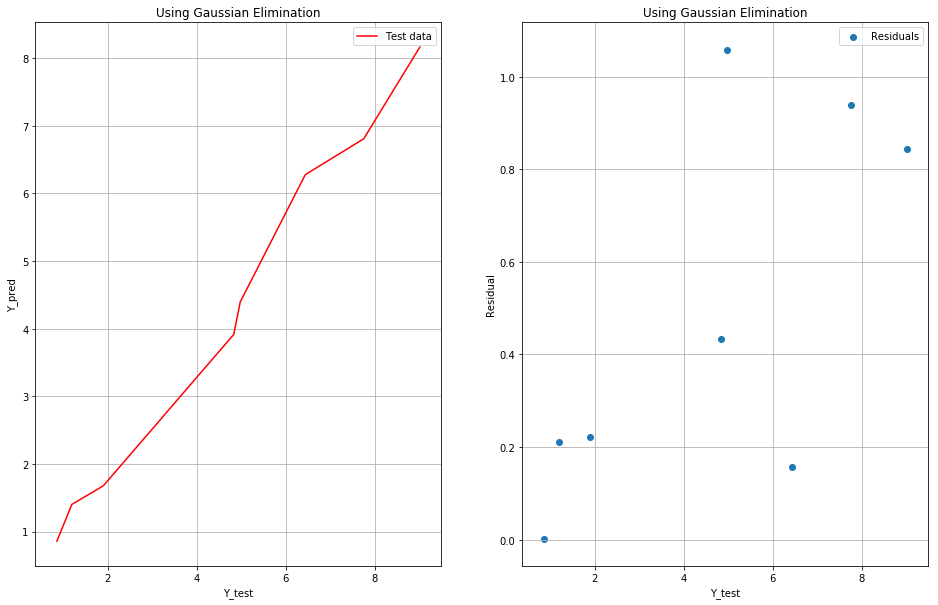

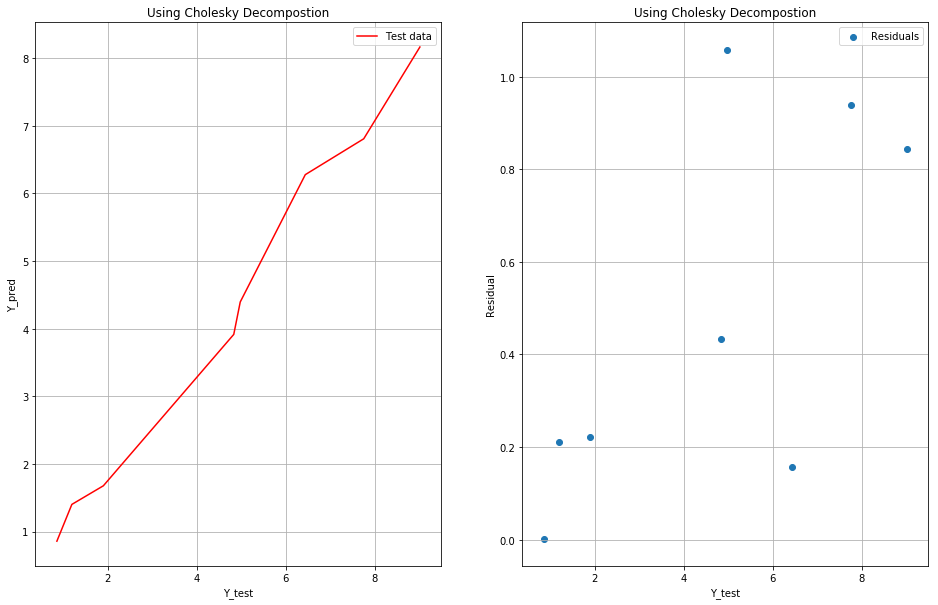

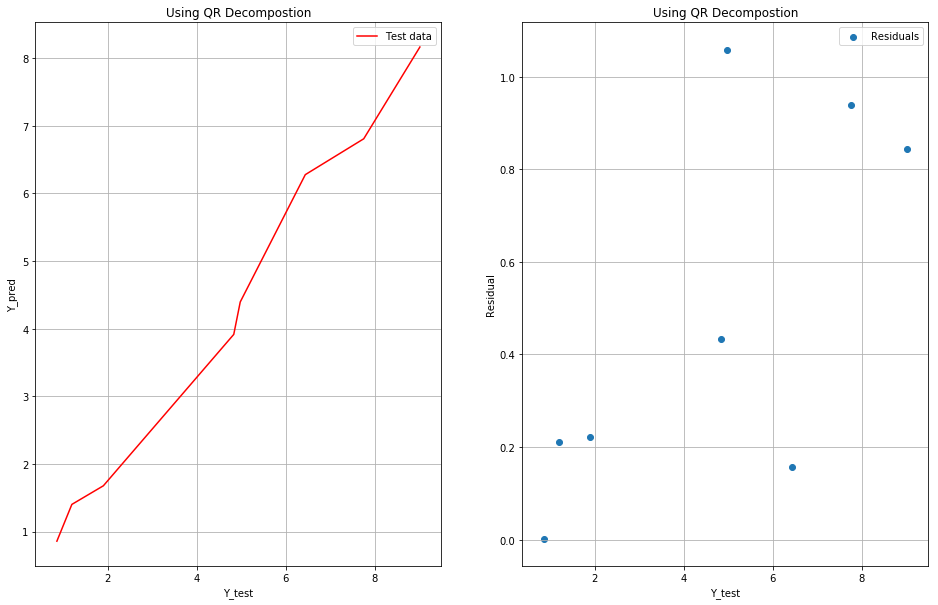

In [676]:
#add bias column at index 0
Xdata.insert(0,'Bias',np.ones(101))
#create income variable
Ydata = Xdata['Income']
Xdata.drop('Income',inplace=True, axis = 1)

#shuffle the dataset
index_matrices = produce_random_index(len(Xdata))
#split the dataset
X_train = Xdata.iloc[index_matrices[:80]]
X_test = Xdata.iloc[index_matrices[80:]]
Y_train = Ydata.iloc[index_matrices[:80]]
Y_test = Ydata.iloc[index_matrices[80:]]

'''
Implementing the learn-linreg-NormEq
'''
X_transpose = X_train.T
X_train = np.dot( X_transpose,X_train)
Y_train = np.dot( X_transpose,Y_train)

#creating test implementation
X_test_transpose = X_test.T
X_test = np.dot( X_test_transpose,X_test)
Y_test = np.dot( X_test_transpose,Y_test)

#call the algorithms and predict the values, following which plot them
gauss(X_train,X_test,Y_test,Y_train)
cholesky(X_train,X_test,Y_test,Y_train)
QR(X_train,X_test,Y_test,Y_train)




# Bench mark testing 

Coefficients: 
 [ 0.38294463  0.3183056   0.03948375 -0.20423029  0.08932402  0.01843792
 -0.07212967  0.08758598]
Mean squared error: 0.04
Variance score: 0.99


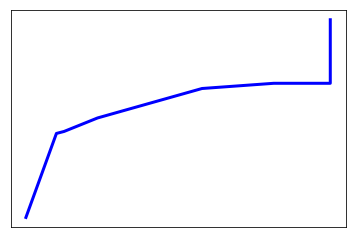

In [661]:
#compare with the library function 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

# Plot outputs
#plt.scatter(Xdata['Price'][:20], np.array(Y_test).reshape(20,1), color='black')
plt.plot(np.sort(Y_test),np.sort(np.abs(y_pred-Y_test)), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### MSE value for library function for the dataset was 0.04 
#### MSE value for my implementaion was 0.04
